# Zipf's Law

[Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law) is an empirical law formulated using mathematical statistics. The law is named after the linguist George Kingsley Zipf, who first proposed it

Zipf's law states that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table. Thus the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc. Another way to state Zipf's law is: small number of words are used all the time, while majority of words are used rarely

We want to see if Amazon reviews corpus follows Zipf's law.

In [1]:
# Setup code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

# Load corpus

We load all train reviews (~3.6M reviews) and do some basic cleaning.

In [2]:
from src.data.loaders import load_and_clean_data
from src.data.preprocessor import Options
from src.definitions import TRAIN_PATH

ROWS = None # Load all reviews

options = (
    Options.EMAILS,
    Options.EMOTICONS,
    Options.PUNCTUATION,
    Options.REPEATING_VOWELS,
    Options.URLS
)

reviews, _ = load_and_clean_data(path=TRAIN_PATH, options=options, nrows=ROWS)


-- Loading dataset
-- Cleaning dataset


# Form word frequency matrix

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(reviews)

print('Total words: {}'.format(len(vectorizer.get_feature_names())))

reviews_matrix = vectorizer.transform(reviews)
word_count = np.sum(reviews_matrix, axis=0)
word_count = np.squeeze(np.asarray(word_count))

df = pd.DataFrame([word_count], columns=vectorizer.get_feature_names()).transpose()
df.rename({0: 'Count'}, axis='columns', inplace=True)
df.sort_values(['Count'], ascending=False, inplace=True)

Total words: 2242816


In [4]:
df.head(20) # 20 most frequent words

,Count
the,14154918
and,7638266
to,6908092
of,5651302
it,5643243
this,5208409
is,4964241
in,3283363
for,3144829
that,2772709


## Plot word frequencies and expected Zipf's distribution

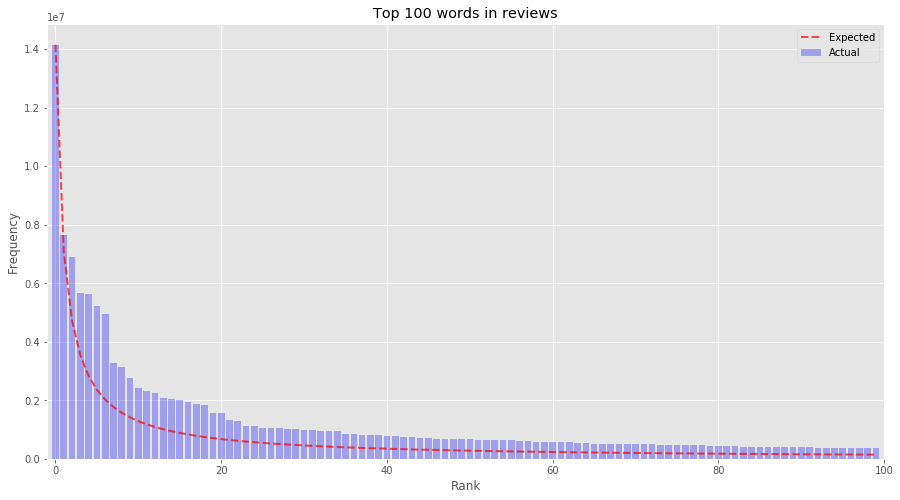

In [7]:
n_words = 100
x = np.arange(n_words)
y = df.iloc[:n_words, 0]
most_frequent_word = y[0]
expected_zipf = [most_frequent_word / (i + 1) for i in range(n_words)]

plt.figure(figsize=(15, 8))
plt.bar(x, y, alpha=0.3, color='b')
plt.plot(x, expected_zipf, color='r', linestyle='--', linewidth=2, alpha=0.7)

plt.xlim([-1, n_words])
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Top {} words in reviews'.format(n_words))
plt.legend(['Expected', 'Actual'])

X axis is rank of frequency from highest rank from left up to 100th rank to the right.

Y axis is frequency of words in given corpus.

We can see that plot follows the trend of Zipf's law. Actual observations in most cases does not strictly follow Zipf’s distribution, but rather follow a trend of “near-Zipfian” distribution.